# Reddit EDA
## Data Source
[Scrapped](https://github.com/interep-project/interep-groups-eda/blob/main/scrapers/src/Reddit.ts) from [Reddit API](https://www.reddit.com/dev/api)

## Data Loading

In [75]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../data/reddit.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data.values())

## Data Exploration

In [3]:
df.describe()

,awardee_karma,awarder_karma,link_karma,total_karma,created,created_utc,comment_karma,subreddit.user_is_contributor,subreddit.user_is_banned,subreddit.community_icon,subreddit.user_is_muted,subreddit.header_size,subreddit.subscribers,subreddit.user_is_moderator,subreddit.user_is_subscriber
count,1.013000e+03,1013.000000,1.012000e+03,1.013000e+03,1.012000e+03,1.012000e+03,1012.000000,0.0,0.0,0.0,0.0,0.0,1012.0,0.0,0.0
mean,3.212185e+03,231.733465,2.091334e+04,3.919637e+04,1.562837e+09,1.562837e+09,14874.437747,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,7.541773e+04,1443.583836,8.344989e+04,1.339781e+05,9.922702e+07,9.922702e+07,51242.779174,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,0.000000e+00,0.000000,1.000000e+00,-1.300000e+01,1.203470e+09,1.203470e+09,-100.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,0.000000e+00,0.000000,2.015000e+02,7.050000e+02,1.515237e+09,1.515237e+09,169.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,5.100000e+01,0.000000,1.531500e+03,4.275000e+03,1.594419e+09,1.594419e+09,1322.500000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,3.070000e+02,49.000000,7.947250e+03,2.057600e+04,1.640198e+09,1.640198e+09,7722.250000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
max,2.397455e+06,35793.000000,1.386273e+06,2.399455e+06,1.676005e+09,1.676005e+09,747939.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
df.head()

,is_employee,is_friend,snoovatar_size,awardee_karma,id,verified,is_gold,is_mod,awarder_karma,has_verified_email,...,subreddit.quarantine,subreddit.banner_size,subreddit.user_is_moderator,subreddit.accept_followers,subreddit.public_description,subreddit.link_flair_enabled,subreddit.disable_contributor_requests,subreddit.subreddit_type,subreddit.user_is_subscriber,is_suspended
0,False,False,None,4383,cx877,True,False,True,3163,True,...,False,"[1280, 384]",NaN,True,BIZARRO!,False,False,user,NaN,NaN
1,False,False,"[380, 600]",5695,3ue2x,True,False,True,1269,True,...,False,"[1280, 384]",NaN,True,,False,False,user,NaN,NaN
2,False,False,None,649,45k7t4n8,True,False,False,27,False,...,False,None,NaN,True,,False,False,user,NaN,NaN
3,False,False,"[380, 600]",0,157ivnmo,True,False,True,0,True,...,False,None,NaN,True,,False,False,user,NaN,NaN
4,False,False,None,10,82srj06q,True,False,False,0,True,...,False,None,NaN,False,,False,False,user,NaN,NaN


In [5]:
df.columns

Index(['is_employee', 'is_friend', 'snoovatar_size', 'awardee_karma', 'id',
       'verified', 'is_gold', 'is_mod', 'awarder_karma', 'has_verified_email',
       'icon_img', 'hide_from_robots', 'link_karma', 'is_blocked',
       'total_karma', 'pref_show_snoovatar', 'name', 'created', 'created_utc',
       'snoovatar_img', 'comment_karma', 'accept_followers', 'has_subscribed',
       'subreddit.default_set', 'subreddit.user_is_contributor',
       'subreddit.banner_img', 'subreddit.allowed_media_in_comments',
       'subreddit.user_is_banned', 'subreddit.free_form_reports',
       'subreddit.community_icon', 'subreddit.show_media',
       'subreddit.icon_color', 'subreddit.user_is_muted',
       'subreddit.display_name', 'subreddit.header_img', 'subreddit.title',
       'subreddit.previous_names', 'subreddit.over_18', 'subreddit.icon_size',
       'subreddit.primary_color', 'subreddit.icon_img',
       'subreddit.description', 'subreddit.submit_link_label',
       'subreddit.header_siz

In [6]:
columns = ['verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed', 'total_karma']

In [7]:
df_reddit = df[columns]

## Data Exploration/Vizualization
### Total Karma Distribution

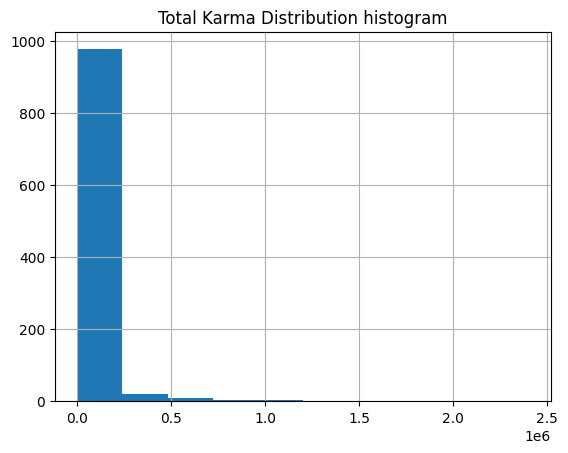

In [8]:
ax = df_reddit['total_karma'].hist()
ax.set_title('Total Karma Distribution histogram');

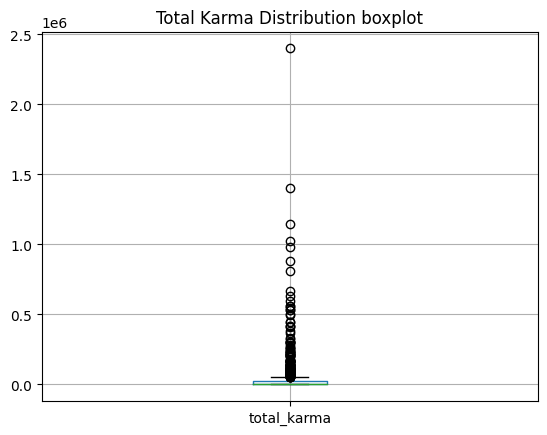

In [9]:
ax = df_reddit.boxplot(column=['total_karma'])
ax.set_title('Total Karma Distribution boxplot');

In [74]:
df_reddit['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999])

0.600       7739.200
0.900      82043.400
0.950     181507.600
0.990     558717.000
0.999    1399276.588
Name: total_karma, dtype: float64

In [85]:
[0] + df_reddit['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999]).tolist()

[0,
 7739.199999999998,
 82043.40000000011,
 181507.59999999954,
 558717.0,
 1399276.5880000147]

In [89]:
count, division = np.histogram(df_reddit['total_karma'], bins=[0] + df_reddit['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999]).tolist())
count

array([606, 303,  51,  40,   9])

## 'verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed', 'total_karma'

In [10]:
df_reddit_bool = df_reddit[['verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed']].astype('bool')

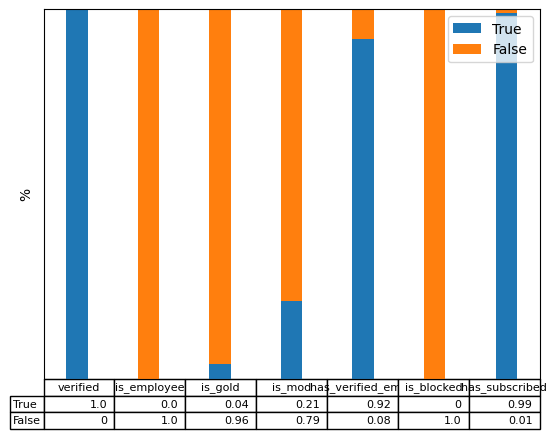

In [73]:
labels = df_reddit_bool.columns
[trues, falses] = [[], []]

for col in df_reddit_bool.columns:
    try:
        t = df_reddit_bool[col].value_counts(normalize=True)[True]
        trues.append(t)
    except:
        trues.append(0)

    try:
        f = df_reddit_bool[col].value_counts(normalize=True)[False]
        falses.append(f)
    except:
        falses.append(0)

[trues, falses] = [[round(t, 2) for t in trues], [round(f, 2) for f in falses]]

width = 0.3
fig, ax = plt.subplots()
ax.bar(labels, trues, width, label='True')
ax.bar(labels, falses, width, bottom=trues, label='False')

ax.set_ylabel('%')
ax.legend()
plt.xticks([])
plt.yticks([])
table = plt.table(cellText=[trues, falses], rowLabels=['True', 'False'], colLabels=labels, loc='bottom')
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

## Conclusion
- Quantitative treshold: `total_karma`

  |  | total\_karma |
  | :--- | :--- |
  | 0.600 | 7739.200 |
  | 0.900 | 82043.400 |
  | 0.950 | 181507.600 |
  | 0.990 | 558717.000 |
  | 0.999 | 1399276.588 |

- Boolean thresholds:
  - exclude `verified` and `has_subscribed`, `is_blocked`, `is_employee`
  - use `is_gold`, `is_mod`, `has_verified_email` (clarify signification first)